In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/processed_aviation_dataset (1).csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,processed_problem,processed_action
0,engine idle override killed engine,tried to adjust idle several times wouldnt adjust
1,engine idle override killed engine,removed replaced fuel servo
2,engine idle override killed engine,a/c was run up set idle speed mixture ok no le...
3,had engine choke briefly lose power on departu...,performed engine run up found cylinder 2 lower...
4,2 4 cylinder rocker cover gaskets leaking,removed replaced gaskets


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Use TF-IDF vectorizer to convert text to numerical features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_problem'])

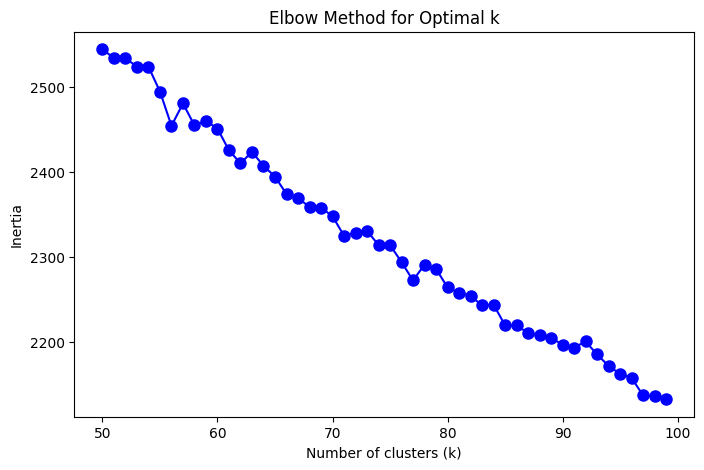

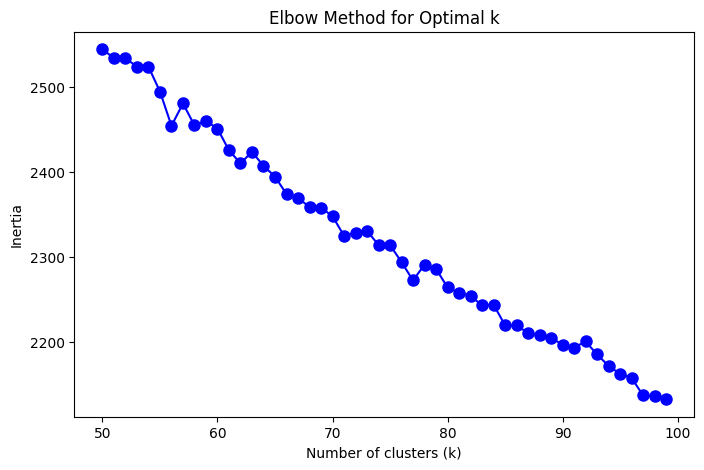

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# List to hold the sum of squared distances for each value of k
inertia = []

# Test different numbers of clusters (k)
k_values = range(50, 100)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Inertia: sum of squared distances to the closest cluster center

# Plot the inertia for each k
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=100, random_state=42)  # You can adjust the number of clusters
df['cluster'] = kmeans.fit_predict(X)

df.head(10)

,processed_problem,processed_action,cluster
0,engine idle override killed engine,tried to adjust idle several times wouldnt adjust,18
1,engine idle override killed engine,removed replaced fuel servo,18
2,engine idle override killed engine,a/c was run up set idle speed mixture ok no le...,18
3,had engine choke briefly lose power on departu...,performed engine run up found cylinder 2 lower...,99
4,2 4 cylinder rocker cover gaskets leaking,removed replaced gaskets,24
5,rocker box cover screws loose all cylinder,tightened screws,79
6,induction tube hose clamps loose all cylinder,tightened hose clamps,98
7,3 intake leaking,removed replaced gasket,14
8,2 intake leaking,removed replaced 2 intake gasket,14
9,4 rocker cover leaking,removed replaced 4 rocker cover gasket,6


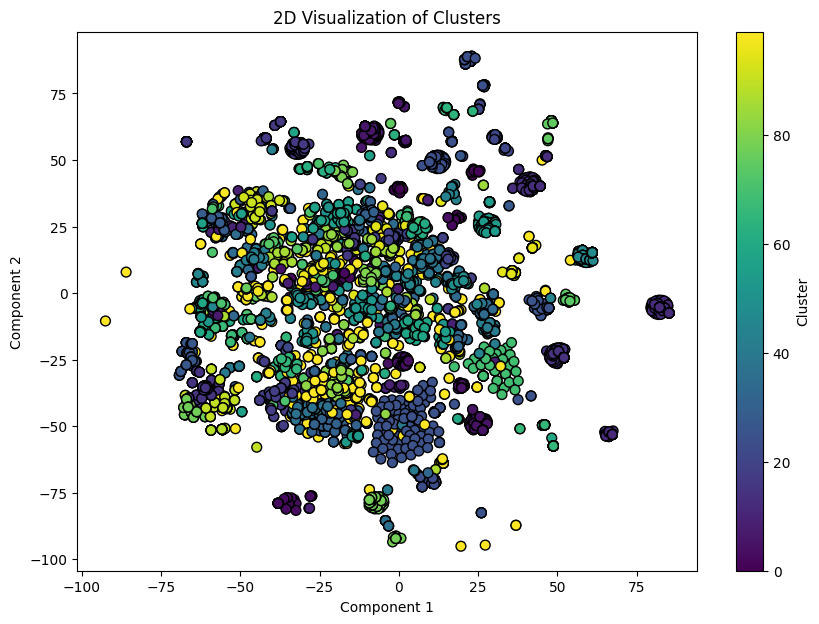

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


# Reduce dimensions to 2D using PCA
# pca = PCA(n_components=2, random_state=42)
# X_pca = pca.fit_transform(X.toarray())  # Convert sparse matrix to dense if needed

# Alternatively, use t-SNE for non-linear dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())

# Plot the 2D scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.colorbar(label='Cluster')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D Visualization of Clusters')
plt.show()


In [ ]:
# Group by clusters and display the first few logs in each cluster
for cluster_num in sorted(df['cluster'].unique()):
    print(f"Cluster {cluster_num}:")
    print(df[df['cluster'] == cluster_num][['processed_problem', 'processed_action']].head(), "\n")


Cluster 0:
                                     processed_problem  \
269              1 2 3 cylinder intake gaskets leaking   
892                leaking intake gaskets cylinder 2 3   
897                cylinder 2 4 intake gaskets leaking   
983   l/h engine cylinder 2 3 4 intake gaskets leaking   
1294               intake gaskets cylinder 2 4 leaking   

                     processed_action  
269      installed new intake gaskets  
892   removed replaced intake gaskets  
897          removed replaced gaskets  
983   removed replaced intake gaskets  
1294  removed replaced intake gaskets   

Cluster 1:
                      processed_problem  \
9                4 rocker cover leaking   
19  rocker cover for cylinder 1 leaking   
48      4 cylinder rocker cover leaking   
55               1 rocker cover leaking   
92               1 rocker cover leaking   

                          processed_action  
9   removed replaced 4 rocker cover gasket  
19                   replaced rocker c

In [ ]:
cluster_num = 1
df[df['cluster'] == cluster_num][['processed_problem', 'processed_action']].head(10)

,processed_problem,processed_action
35,l/h engine all 4 rocker cover gaskets leaking,replaced all rocker cover gaskets
215,r/h engine all 4 rocker cover gaskets seeping,removed replaced all gaskets
240,r/h engine all rocker cover gaskets leaking,installed new r/h engine rocker box cover gaskets
484,l/h engine all intakes leaking,removed replaced gaskets
501,all 4 rocker cover gaskets leaking,replaced all 4 rocker cover gaskets
605,l/h engine has all 4 rocker gaskets leaking,replaced gaskets leak check good
1003,rocker gaskets leaking all 4,removed replaced all 4 rocker cover gaskets
1357,all 4 rocker gaskets leaking,replaced w/ new rocker gaskets leak check good
1387,l/h all 4 rocker gaskets leaking,removed replaced all rocker cover gaskets
1388,r/h engine all 4 rocker gaskets leaking,removed replaced all rocker cover gaskets


In [ ]:
cluster_num = 2
df[df['cluster'] == cluster_num][['processed_problem', 'processed_action']].head(10)

,processed_problem,processed_action
45,baffle seals on r/h side torn,applied silicone to torn areas
49,1 2 6 cowl mounts torn,removed replaced mounts
58,3 rocker cover gasket torn,removed replaced 3 rocker cover gasket
59,4 rocker cover gasket torn,removed replaced 4 rocker cover gasket
336,r/h engine 1 cylinder side baffle seal torn,removed replaced seal
436,r/h forward baffle seal torn,repaired hole in baffle seal
514,3 rocker cover gasket torn,removed replaced rocker cover gasket
525,1 2 3 cowl shock mounts torn,removed replaced cowl shock mounts
667,3 rocker cover gasket torn,removed replaced rocker cover gasket
668,1 3 4 rocker cover gaskets torn,removed replaced rocker cover gaskets


In [ ]:
cluster_num = 3
df[df['cluster'] == cluster_num][['processed_problem', 'processed_action']].head(10)

,processed_problem,processed_action
203,intakes 2 4 leaking on l/h engine,removed replaced intake gasket 2 3 4 on l/h en...
364,2 3 intakes on l/h engine leaking,replaced 2 3 intake gaskets on l/h engine
440,intakes 2 4 leaking on l/h engine,removed replaced intake gaskets 2 4 on l/h engine
441,intakes 2 3 4 leaking on r/h engine,removed replaced intake gaskets 2 3 4 on r/h engi
549,1 2 intakes leaking on l/h engine,removed replaced 1 2 gaskets w/ new
557,intakes 3 4 leaking on r/h engine,removed replaced intake gaskets w/ new
558,intakes 1 2 3 4 leaking on l/h engine,removed replaced intake tube gaskets
588,on l/h engine 2 3 4 intakes leaking,removed replaced gaskets
650,intakes 2 3 4 leaking on r/h engine,removed replaced gaskets
651,intakes 2 3 4 leaking on l/h engine,removed replaced intake gaskets


In [ ]:
df['cluster'].value_counts()

,count
cluster,
99,324
14,304
47,274
6,216
5,207
...,...
36,13
76,11
72,9


### We can observe that clustering gives us fairly good results, grouping together similar set of problems and actions.
## Clustering pipeline:

1.   Embeddings (tf-idf, word2vec, glove, bert)
2.   Clustering algorithm (K-means, dbscan, birch, knn, gmms)
3.   no of clusters




so i need to design make a summarized dashboard form of report which will generate summary and at the same time implement a question answering model as well.
how will i approach this problem?
i need to research more on question answering, summary and llms model